In [25]:
import pandas as pd
import numpy as np

In [26]:
data = pd.read_spss("p2_data.sav")
data.columns

Index(['Code', 'Group', 'groups_1.5sdreading', 'groups_1.5sdspelling',
       'groups_cueing_index', 'groups_position_index', 'age', 'SLS_Perc',
       'SLS_RV', 'SLRT_W_Perc', 'SLRT_W_RV', 'SLRT_PW_Perc', 'SLRT_PW_RV',
       'DRT3_Perc', 'DRT3_RV_correct', 'IQ_CFT_3class', 'WISC_V_stdV',
       'WISC_Digitspan_stdV', 'WISC_SS_stdV', 'PA_perc_correct', 'RAN_N_ics',
       'ADHD_score', 'RTs_valid_Left', 'RTs_valid_Right', 'RTs_invalid_Left',
       'RTs_invalid_Right', 'RTs_valid', 'RTs_invalid', 'RTs_LEFT',
       'RTs_RIGHT', 'RTs_overall', 'Z_valid_LEFT', 'Z_valid_RIGHT',
       'Z_invalid_LEFT', 'Z_invalid_RIGHT', 'exclude_SD_group',
       'exclude_RD_group'],
      dtype='object')

In [27]:
data = data[['Group', 'RTs_valid_Left', 'RTs_valid_Right', 'RTs_invalid_Left',
       'RTs_invalid_Right', 'RTs_valid', 'RTs_invalid', 'RTs_LEFT',
       'RTs_RIGHT', 'RTs_overall', 'Z_valid_LEFT', 'Z_valid_RIGHT',
       'Z_invalid_LEFT', 'Z_invalid_RIGHT']]
data.columns = [column.replace("RTs_", "") for column in data.columns]
data_mean = data.groupby("Group").mean().T
data_std = data.groupby("Group").std().T

In [28]:
mux = pd.MultiIndex.from_product([['C','RD','SD', 'RSD'], ['mean','std']])
df = pd.DataFrame(columns=mux)
df["Group"] = pd.Series([
    "valid_Left", "valid_Right", "invalid_Left", "invalid_Right", "valid", "invalid", "LEFT", "RIGHT", "overall"])
df.set_index(df["Group"], inplace=True)
df = df[['C','RD','SD', 'RSD']]

for column in df:
    df[column[0], "mean"] = np.ceil(data_mean[column[0]])
    df[column[0], "std"] = np.ceil(data_std[column[0]])


In [29]:
df = df.dropna()
df

C            RD            SD           RSD       
                mean    std   mean    std   mean    std   mean    std
Group                                                                
valid_Left     442.0  111.0  487.0   95.0  408.0  101.0  478.0  133.0
valid_Right    436.0  101.0  456.0   86.0  406.0  103.0  479.0  115.0
invalid_Left   478.0  122.0  502.0  109.0  436.0  135.0  486.0  121.0
invalid_Right  461.0  111.0  467.0  111.0  433.0  113.0  473.0  130.0
valid          439.0  102.0  468.0   84.0  407.0   98.0  477.0  118.0
invalid        470.0  110.0  486.0  104.0  434.0  118.0  479.0  118.0
LEFT           458.0  111.0  493.0   93.0  419.0  107.0  481.0  121.0
RIGHT          447.0  100.0  460.0   93.0  418.0  105.0  475.0  114.0
overall        453.0  102.0  476.0   90.0  419.0  104.0  479.0  114.0

In [30]:
plot_data = data.copy()[['Group', 'Z_valid_LEFT', 'Z_valid_RIGHT',
       'Z_invalid_LEFT', 'Z_invalid_RIGHT']]
plot_data["divider"] = 2
plot_data["valid"] = plot_data.loc[:,['Z_valid_LEFT','Z_valid_RIGHT']].sum(axis=1).div(plot_data["divider"])
plot_data["invalid"] = plot_data.loc[:,['Z_invalid_LEFT','Z_invalid_RIGHT']].sum(axis=1).div(plot_data["divider"])
plot_data["left"] = plot_data.loc[:,['Z_valid_LEFT', 'Z_invalid_LEFT']].sum(axis=1).div(plot_data["divider"])
plot_data["right"] = plot_data.loc[:,['Z_valid_RIGHT','Z_invalid_RIGHT']].sum(axis=1).div(plot_data["divider"])
a = plot_data.groupby("Group").mean()
b = plot_data.groupby("Group").std()
c = plot_data.groupby("Group").count()
print(c)
err = b.copy()
err["valid"] = err["valid"].div(c["valid"]**(1/2))
err["invalid"] = err["invalid"].div(c["invalid"]**(1/2))
err["left"] = err["left"].div(c["left"]**(1/2))
err["right"] = err["right"].div(c["right"]**(1/2))
err

       Z_valid_LEFT  Z_valid_RIGHT  Z_invalid_LEFT  Z_invalid_RIGHT  divider  \
Group                                                                          
C                66             66              66               66       66   
RD               28             28              28               28       28   
RSD              52             52              52               52       52   
SD               45             45              45               45       45   

       valid  invalid  left  right  
Group                               
C         66       66    66     66  
RD        28       28    28     28  
RSD       52       52    52     52  
SD        45       45    45     45  


,Z_valid_LEFT,Z_valid_RIGHT,Z_invalid_LEFT,Z_invalid_RIGHT,divider,valid,invalid,left,right
Group,,,,,,,,,
C,0.329484,0.333849,0.397982,0.364040,0.0,0.027399,0.029893,0.024136,0.022310
RD,0.396027,0.243192,0.383138,0.341893,0.0,0.043703,0.041474,0.035428,0.029708
RSD,0.372544,0.347600,0.375195,0.424174,0.0,0.029476,0.032271,0.030993,0.032765
SD,0.378763,0.281349,0.424632,0.286326,0.0,0.030652,0.031871,0.029113,0.024324


In [31]:
import matplotlib.pyplot as plt

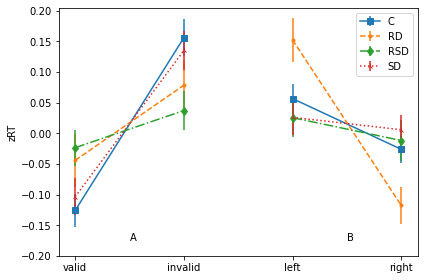

In [32]:
fig, ax = plt.subplots()

linestyles = ['-','--','-.',':']
markers = ['s','.','d','2']

for g, linestyle, marker in zip(a.index, linestyles, markers):
    err_lines1 = ax.errorbar(
        ["valid", "invalid"], 
        [a["valid"][g], a["invalid"][g]],
        [err["valid"][g], err["invalid"][g]],
        label=g, marker=marker, linestyle=linestyle
    )

    err_lines2 = ax.errorbar(
        ["left", "right"], 
        [a["left"][g], a["right"][g]],
        [err["left"][g], err["right"][g]],
        color=plt.getp(err_lines1[0],"color"),
        label=g, marker=marker, linestyle=linestyle,
    )

ax.set_yticks([i/100 for i in range(-20,21,5)])
ax.set_ylabel("zRT")

ax.annotate("A", (0.5, -0.175))
ax.annotate("B", (2.5, -0.175))

handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')
fig.tight_layout()

plt.savefig("p2_figure1.png", dpi=300)
plt.show()